In [1]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
import math
import pylab as py
import sys
import numpy.ma as ma
from decimal import Decimal
import os
from importlib import reload
import h5py

In [2]:
filepath = "/net/scratch4/giannis_kx/pixie3d/iter/int_kink/12/12.scratch/pixie3d.h5"

In [3]:
f = h5py.File(filepath,'r')

In [4]:
timesteps = list(f.keys())

In [5]:
len(timesteps)

85

In [6]:
variables = list(f[timesteps[0]].keys())

In [7]:
variables

['Car_variables',
 'Cnv_variables',
 'Cov_variables',
 'Diagnostics',
 'Perturbations',
 'cells',
 'nodes']

In [8]:
Cov_var = list(f[timesteps[0]][variables[2]].keys())

In [9]:
Cov_var

['B_1',
 'B_2',
 'B_3',
 'J_1',
 'J_2',
 'J_3',
 'T=Te+Ti',
 'V_1',
 'V_2',
 'V_3',
 'rho']

In [10]:
diag = list(f[timesteps[0]][variables[3]].keys())

In [11]:
diag

['E_1',
 'E_2',
 'E_3',
 'Int. heat src',
 'Poloidal flux',
 'Temperature',
 'V.(b x grad(psi))',
 'V.grad(psi)',
 'V||',
 'chi',
 'eta',
 'lambda',
 'local div(B)',
 'local div(J)',
 'local div(V)',
 'nu',
 'q factor']

In [12]:
Car_var = list(f[timesteps[0]][variables[0]].keys())

In [13]:
Car_var

['Bx',
 'By',
 'Bz',
 'Jx',
 'Jy',
 'Jz',
 'T=Te+Ti',
 'Ve_1',
 'Ve_2',
 'Ve_3',
 'Vx',
 'Vy',
 'Vz',
 'rho']

In [14]:
cell_var = list(f[timesteps[0]][variables[5]].keys())
X = np.asarray(f[timesteps[0]][variables[5]][cell_var[0]])
Y = np.asarray(f[timesteps[0]][variables[5]][cell_var[1]])
Z = np.asarray(f[timesteps[0]][variables[5]][cell_var[2]])

In [19]:
X.shape

(128, 64, 32)

In [18]:
Z = np.swapaxes(Z,0,2)

In [20]:
J_phi = np.asarray([f[ts][variables[2]][Cov_var[5]] for ts in timesteps[0:-1]])

In [24]:
J_phi.shape

(128, 64, 32, 84)

In [23]:
J_phi = np.swapaxes(J_phi,1,2)

In [25]:
J_phi_tor = np.mean(J_phi,axis=2)

In [26]:
J_phi_tor.shape

(128, 64, 84)

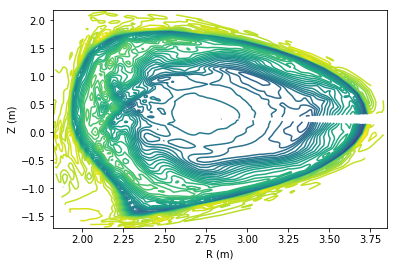

In [33]:
plt.contour(X[:,:,0],Z[:,:,0],J_phi[:,:,0,75],50)
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.show()

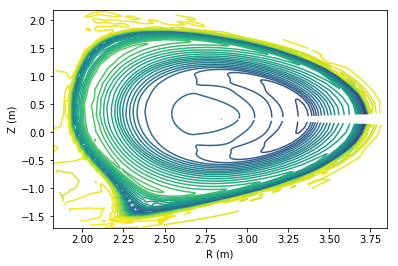

In [32]:
plt.contour(X[:,:,0],Z[:,:,0],J_phi_tor[:,:,75],50)
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.show()

In [34]:
R = [x for x in range(X.shape[0])]

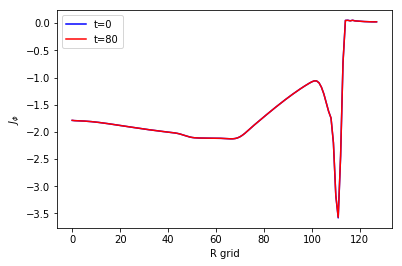

In [57]:
plt.plot(R,J_phi_tor[:,0,0],'b',label='t=0')
plt.plot(R,J_phi_tor[:,0,80],'r',label='t=80')
plt.xlabel('R grid')
plt.ylabel(r'$J_{\phi}$')
plt.legend()
plt.show()

## Velocities

In [36]:
Vx = np.asarray([f[ts][variables[0]][Car_var[10]] for ts in timesteps[0:-1]])
Vy = np.asarray([f[ts][variables[0]][Car_var[11]] for ts in timesteps[0:-1]])
Vz = np.asarray([f[ts][variables[0]][Car_var[12]] for ts in timesteps[0:-1]])

In [40]:
Vx.shape

(129, 65, 33, 84)

In [44]:
Vz = np.swapaxes(Vz,1,2)

In [45]:
import pixie_read_st as pxr

In [48]:
Vz = pxr.f2c(Vz)

In [49]:
V_plane = np.sqrt(np.power(Vx,2) + np.power(Vz,2))

In [50]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [54]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set_xlabel('R (m)')
    ax.set_ylabel('Z (m)')
    ims = []
    for time in range(10,84):
        im = ax.quiver(X[::6,:,0],Z[::6,:,0],Vx[::6,:,0,time],Vz[::6,:,0,time], edgecolor='k', facecolor='k',linewidth=.5,headwidth=8)
        text = 't = '+str(time)
        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im]+[an])
    art_ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000,blit=False)
    return art_ani

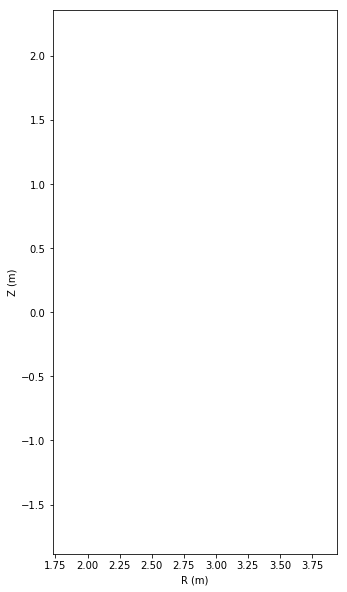

In [55]:
ani = anim()

In [56]:
HTML(ani.to_html5_video())

In [69]:
Temp = np.asarray([f[ts][variables[3]][diag[5]] for ts in timesteps[0:-1]])

In [70]:
Temp.shape

(84, 33, 65, 129)

In [71]:
Temp = np.swapaxes(Temp,0,3)

In [73]:
Temp = pxr.f2c(Temp)

TypeError: Shape of x does not match that of z: found (128, 64) instead of (128, 33).

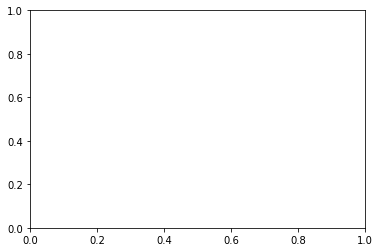

In [74]:
plt.contour(X[:,:,0],Z[:,:,0],Temp[:,:,0,70],50)
plt.colorbar()
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.show()

In [72]:
Temp = pxr.periodicity(Temp)